# Movie Revenue Prediction

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from datetime import datetime as dt


### Configurations

In [2]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.style.use("dark_background")
endDel = "\n\t" + "---" * 15 + "\n"
pd.set_option("display.float_format", "{:,.0f}".format)


### Data Loading

In [3]:
directors = pd.read_csv("Training_data/Prediction_data/movie-director.csv", header=0, names=["Movie_Title", "Director"])
actors = pd.read_csv(
    "Training_data/Prediction_data/movie-voice-actors.csv", header=0, names=["Character", "Actor", "Movie_Title"]
)
revenues = pd.read_csv(
    "Training_data/Prediction_data/movies-revenue.csv",
    header=0,
    names=["Movie_Title", "Release_Date", "Genre", "MPAA_Rating", "Revenue"],
)
revenues.Revenue = pd.to_numeric(revenues.Revenue.str.replace(r"\D", "", regex=True))
revenues.Release_Date = pd.to_datetime(revenues.Release_Date, format="%d-%b-%y")

original_data = pd.merge(directors, pd.merge(actors, revenues, on="Movie_Title", how="outer"), on="Movie_Title", how="outer")
original_data


,Movie_Title,Director,Character,Actor,Release_Date,Genre,MPAA_Rating,Revenue
0,Snow White and the Seven Dwarfs,David Hand,Bashful,Scotty Mattraw,2037-12-21,Musical,G,"5,228,953,251"
1,Snow White and the Seven Dwarfs,David Hand,Doc,Roy Atwell,2037-12-21,Musical,G,"5,228,953,251"
2,Snow White and the Seven Dwarfs,David Hand,Dopey,Eddie Collins,2037-12-21,Musical,G,"5,228,953,251"
3,Snow White and the Seven Dwarfs,David Hand,Grumpy,Pinto Colvig,2037-12-21,Musical,G,"5,228,953,251"
4,Snow White and the Seven Dwarfs,David Hand,Happy,Otis Harlan,2037-12-21,Musical,G,"5,228,953,251"
...,...,...,...,...,...,...,...,...
1245,Encino Man,NaN,NaN,NaN,1992-05-22,Comedy,PG,"81,369,058"
1246,Sweet Home Alabama,NaN,NaN,NaN,2002-09-27,Comedy,PG-13,"184,521,151"
1247,Play it to the Bone,NaN,NaN,NaN,1999-12-24,Comedy,R,"13,180,524"
1248,The Odd Life of Timothy Green,NaN,NaN,NaN,2012-08-15,Drama,PG,"54,914,942"


### Data Exploration

In [4]:
original_data.head()


,Movie_Title,Director,Character,Actor,Release_Date,Genre,MPAA_Rating,Revenue
0,Snow White and the Seven Dwarfs,David Hand,Bashful,Scotty Mattraw,2037-12-21,Musical,G,"5,228,953,251"
1,Snow White and the Seven Dwarfs,David Hand,Doc,Roy Atwell,2037-12-21,Musical,G,"5,228,953,251"
2,Snow White and the Seven Dwarfs,David Hand,Dopey,Eddie Collins,2037-12-21,Musical,G,"5,228,953,251"
3,Snow White and the Seven Dwarfs,David Hand,Grumpy,Pinto Colvig,2037-12-21,Musical,G,"5,228,953,251"
4,Snow White and the Seven Dwarfs,David Hand,Happy,Otis Harlan,2037-12-21,Musical,G,"5,228,953,251"


In [5]:
original_data.isna().sum()


Movie_Title       0
Director        714
Character       424
Actor           424
Release_Date    353
Genre           367
MPAA_Rating     458
Revenue         353
dtype: int64

In [6]:
original_data.describe()


,Revenue
count,897
mean,"256,307,552"
std,"636,767,911"
min,0
25%,"50,553,142"
50%,"119,860,589"
75%,"216,807,832"
max,"5,228,953,251"


In [7]:
print(original_data.Genre.unique(), end=endDel)
print(original_data.MPAA_Rating.unique(), end=endDel)
print(original_data.Director.unique(), end=endDel)


['Musical' nan 'Drama' 'Adventure' 'Comedy' 'Romantic Comedy' 'Action'
 'Horror' 'Thriller/Suspense' 'Documentary' 'Black Comedy' 'Western'
 'Concert/Performance']
	---------------------------------------------
['G' nan 'PG' 'R' 'PG-13' 'Not Rated']
	---------------------------------------------
['David Hand' 'full credits' 'Ben Sharpsteen' 'Jack Kinney'
 'Norman Ferguson' 'Clyde Geronimi' 'Wilfred Jackson' 'Hamilton Luske'
 'Wolfgang Reitherman' 'Art Stevens' 'Ted Berman' 'Ron Clements'
 'Mike Gabriel' 'Gary Trousdale' 'Barry Cook' 'Chris Buck' 'Ralph Zondag'
 'Mark Dindal' 'Chris Sanders' 'Robert Walker' 'Will Finn'
 'Stephen J. Anderson' 'Nathan Greno' 'Rich Moore' 'Byron Howard' nan]
	---------------------------------------------


In [8]:
# Some dates are incorrectly parsed
original_data.Release_Date.describe(datetime_is_numeric=True)


count                              897
mean     2003-01-01 07:55:11.036789376
min                1970-04-24 00:00:00
25%                1992-11-11 00:00:00
50%                2000-11-22 00:00:00
75%                2009-11-25 00:00:00
max                2068-02-08 00:00:00
Name: Release_Date, dtype: object

### Data Cleaning

In [9]:
original_data.dropna(subset=["Revenue"], inplace=True)
original_data.MPAA_Rating.fillna("Not Rated", inplace=True)
original_data.Director.fillna("Other", inplace=True)
original_data.Genre.fillna("Other", inplace=True)


In [10]:
original_data.isna().sum()
original_data[original_data.Character.isna()]
original_data[original_data.Actor.isna()]


,Movie_Title,Director,Character,Actor,Release_Date,Genre,MPAA_Rating,Revenue
182,The Many Adventures of Winnie the Pooh,Wolfgang Reitherman,NaN,NaN,1977-03-11,Other,Not Rated,0
484,Winnie the Pooh,Stephen J. Anderson,NaN,NaN,2011-07-15,Adventure,G,"28,375,869"
828,Recess: School's Out,Other,NaN,NaN,2001-02-16,Comedy,G,"54,656,124"
829,D2: The Mighty Ducks,Other,NaN,NaN,1994-03-25,Comedy,PG,"94,226,333"
830,Young Black Stallion,Other,NaN,NaN,2003-12-25,Adventure,G,"9,254,344"
...,...,...,...,...,...,...,...,...
1245,Encino Man,Other,NaN,NaN,1992-05-22,Comedy,PG,"81,369,058"
1246,Sweet Home Alabama,Other,NaN,NaN,2002-09-27,Comedy,PG-13,"184,521,151"
1247,Play it to the Bone,Other,NaN,NaN,1999-12-24,Comedy,R,"13,180,524"
1248,The Odd Life of Timothy Green,Other,NaN,NaN,2012-08-15,Drama,PG,"54,914,942"


In [11]:
# Fix incorrect year parsing
original_data.Release_Date = original_data.Release_Date.apply(
    lambda x: x.replace(year=x.year - 100 if x.year > dt.today().year else x.year)
)
original_data.Release_Date.describe(datetime_is_numeric=True)


count                              897
mean     1995-11-13 07:26:17.257525120
min                1937-12-21 00:00:00
25%                1990-11-16 00:00:00
50%                1998-06-19 00:00:00
75%                2007-03-30 00:00:00
max                2016-12-16 00:00:00
Name: Release_Date, dtype: object

### Visualization

In [12]:
# Drop duplicate movies FOR VISUALIZATION
unique_records = original_data.drop_duplicates(subset=["Movie_Title"])


#### Frequency of Genres & MPAA_Ratings

<AxesSubplot:title={'center':'MPAA_Rating'}>

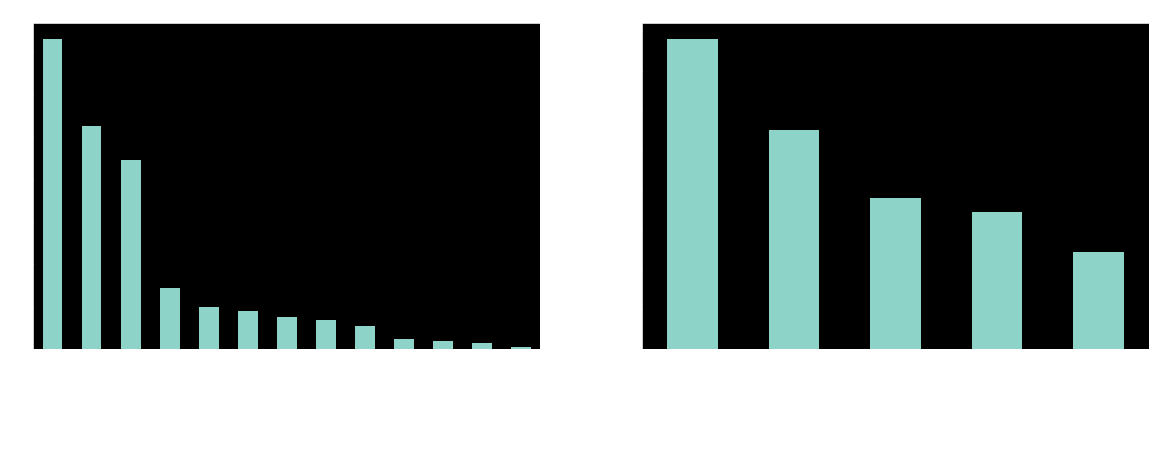

In [13]:
_, ax = plt.subplots(1, 2, figsize=(20, 6))
unique_records.Genre.value_counts().plot(ax=ax[0], kind="bar", title="Genre")
unique_records.MPAA_Rating.value_counts().plot(ax=ax[1], kind="bar", title="MPAA_Rating")


#### How much revenue each Genre/Director contributed

<AxesSubplot:title={'center':'Directors'}, xlabel='Director'>

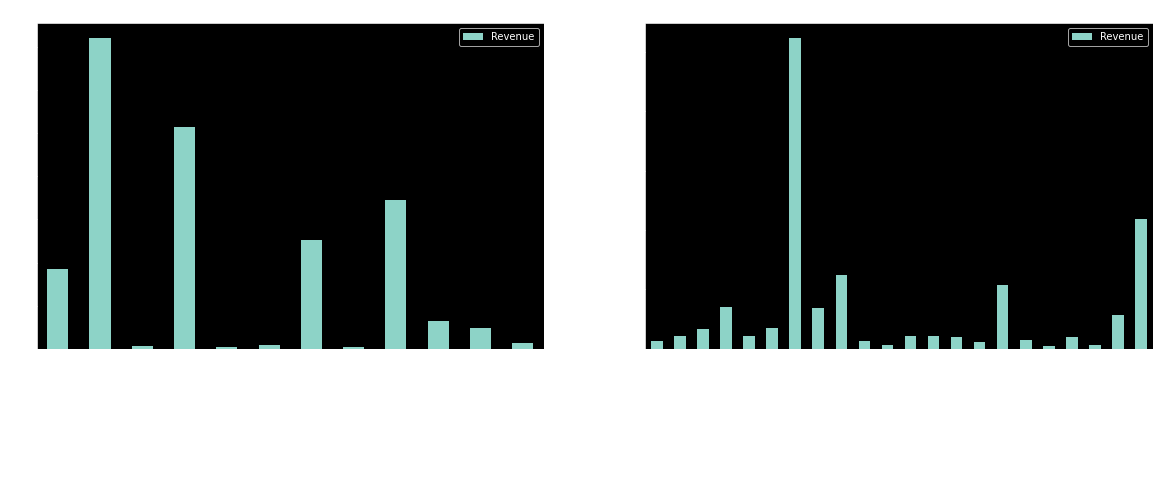

In [14]:
_, ax = plt.subplots(1, 2, figsize=(20, 6))

# dont consider 'other' genres
pd.pivot_table(
    unique_records[unique_records.Genre != "Other"],
    index="Genre",
    values="Revenue",
    aggfunc="sum",
).plot(kind="bar", ax=ax[0], title="Genres")

# dont consider 'other' directors
pd.pivot_table(
    unique_records[unique_records.Director != "Other"],
    index="Director",
    values="Revenue",
    aggfunc="sum",
).plot(kind="bar", ax=ax[1], title="Directors")


### Feature Engineering

In [15]:
release_day = original_data.Release_Date.dt.day
release_month = original_data.Release_Date.dt.month
release_year = original_data.Release_Date.dt.year

movie_age = dt.today().year - release_year
movie_age.corr(original_data.Revenue)

0.5735498919541642

In [16]:
original_data.corr()

,Revenue
Revenue,1


#### Movies ages histogram

<AxesSubplot:ylabel='Frequency'>

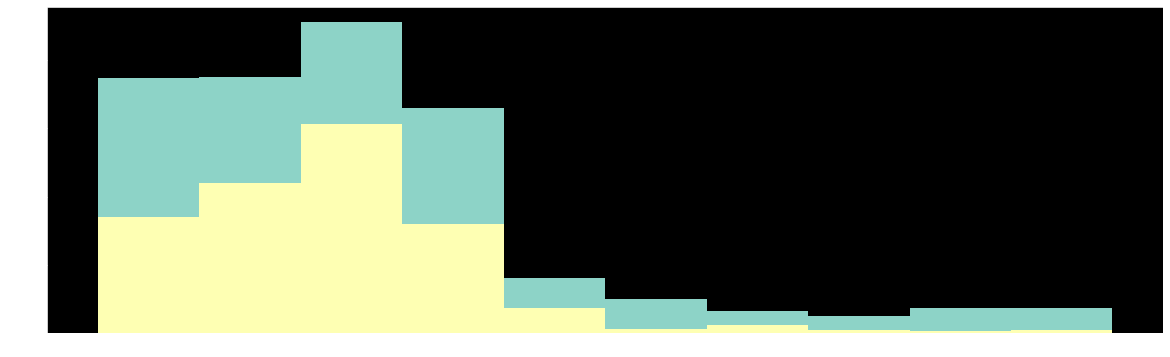

In [17]:
movie_age.plot(kind="hist", figsize=(20, 6))
(dt.today().year - unique_records.Release_Date.dt.year).plot(
    kind="hist", figsize=(20, 6)
)  # unique records also retain the same age distribution


### Data Preprocessing

### Basic Models

### Ensemble Models

### Grid Search

### Models Testing